# **Project: Amazon Product Recommendation System**

# **Marks: 60**


Welcome to the project on Recommendation Systems. We will work with the Amazon product reviews dataset for this project. The dataset contains ratings of different electronic products. It does not include information about the products or reviews to avoid bias while building the model.

--------------
## **Context:**
--------------

Today, information is growing exponentially with volume, velocity and variety throughout the globe. This has lead to information overload, and too many choices for the consumer of any business. It represents a real dilemma for these consumers and they often turn to denial. Recommender Systems are one of the best tools that help recommending products to consumers while they are browsing online. Providing personalized recommendations which is most relevant for the user is what's most likely to keep them engaged and help business.

E-commerce websites like Amazon, Walmart, Target and Etsy use different recommendation models to provide personalized suggestions to different users. These companies spend millions of dollars to come up with algorithmic techniques that can provide personalized recommendations to their users.

Amazon, for example, is well-known for its accurate selection of recommendations in its online site. Amazon's recommendation system is capable of intelligently analyzing and predicting customers' shopping preferences in order to offer them a list of recommended products. Amazon's recommendation algorithm is therefore a key element in using AI to improve the personalization of its website. For example, one of the baseline recommendation models that Amazon uses is item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real-time.

----------------
## **Objective:**
----------------

You are a Data Science Manager at Amazon, and have been given the task of building a recommendation system to recommend products to customers based on their previous ratings for other products. You have a collection of labeled data of Amazon reviews of products. The goal is to extract meaningful insights from the data and build a recommendation system that helps in recommending products to online consumers.

-----------------------------
## **Dataset:**
-----------------------------

The Amazon dataset contains the following attributes:

- **userId:** Every user identified with a unique id
- **productId:** Every product identified with a unique id
- **Rating:** The rating of the corresponding product by the corresponding user
- **timestamp:** Time of the rating. We **will not use this column** to solve the current problem

**Note:** The code has some user defined functions that will be usefull while making recommendations and measure model performance, you can use these functions or can create your own functions.

Sometimes, the installation of the surprise library, which is used to build recommendation systems, faces issues in Jupyter. To avoid any issues, it is advised to use **Google Colab** for this project.

Let's start by mounting the Google drive on Colab.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Installing surprise library**

In [2]:
!pip install surprise #installing the surprise library,
#this was a big blank when I loaded the file

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.7 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp312-cp312-linux_x86_64.whl size=2611306 sha256=e90d1efade8fc904506139a5cfa8f6b9301129221df84c018a9aacac0b0f297a
  Stored in directory: /root/.cache/pip/wheels/75/fa/bc/739bc2cb1fbaab6061854e6cfbb81a0ae52c92a502a7fa454b
Successfully built scikit-surprise


**Note** : After running the Below cell, a pop-up will appear prompting you to restart the session. Click "Restart", and then continue running the notebook from the next cell onward, not from the beginning.

In [1]:
!pip install numpy==1.26.0

## **Importing the necessary libraries and overview of the dataset**

In [2]:
#importing pandas for loading and data manipulation
import pandas as pd

#to adapt item-to-item filtering via SVD
from surprise import Dataset, Reader, SVD

#splitting our data into train and test sets
from surprise.model_selection import train_test_split

#for evaluating our model performance and complete the loop
from surprise import accuracy

#Import matplotlib for plotting
import matplotlib.pyplot as plt

'''
Observed building a complete loop for model training,
implementation, graphical analysis
'''

'\nObserved building a complete loop for model training,\nimplementation, graphical analysis\n'

### **Loading the data**
- Import the Dataset
- Add column names ['user_id', 'prod_id', 'rating', 'timestamp']
- Drop the column timestamp
- Copy the data to another DataFrame called **df**

In [4]:
#1+2 #import the dataset, indent #assign column names as prescribed
data = pd.read_csv('/content/drive/My Drive/Python Course/ratings_Electronics.csv',
                   names=['user_id', 'prod_id', 'rating', 'timestamp'])

#3 #dropping our timestamp column, columns axis 1
data = data.drop('timestamp', axis=1)

#4 #set our DataFrame to be named df and copy the data to it
df = data.copy()

'''
Observed dataset imported from mounted drive, assigning/adding column names,
remove axis 1 timestamp, and copy to df for best practice
'''

'\nObserved dataset imported from mounted drive, assigning/adding column names,\nremove axis 1 timestamp, and copy to df for best practice\n'

**As this dataset is very large and has 7,824,482 observations, it is not computationally possible to build a model using this. Moreover, many users have only rated a few products and also some products are rated by very few users. Hence, we can reduce the dataset by considering certain logical assumptions.**

Here, we will be taking users who have given at least 50 ratings, and the products that have at least 5 ratings, as when we shop online we prefer to have some number of ratings of a product.

In [5]:
# Get the column containing the users
users = df.user_id

# Create a dictionary from users to their number of ratings
ratings_count = dict()

for user in users:

    # If we already have the user, just add 1 to their rating count
    if user in ratings_count:
        ratings_count[user] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[user] = 1

In [6]:
# We want our users to have at least 50 ratings to be considered
RATINGS_CUTOFF = 50

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df = df.loc[ ~ df.user_id.isin(remove_users)]

In [7]:
# Get the column containing the products
prods = df.prod_id

# Create a dictionary from products to their number of ratings
ratings_count = dict()

for prod in prods:

    # If we already have the product, just add 1 to its rating count
    if prod in ratings_count:
        ratings_count[prod] += 1

    # Otherwise, set their rating count to 1
    else:
        ratings_count[prod] = 1

In [8]:
# We want our item to have at least 5 ratings to be considered
RATINGS_CUTOFF = 5

remove_users = []

for user, num_ratings in ratings_count.items():
    if num_ratings < RATINGS_CUTOFF:
        remove_users.append(user)

df_final = df.loc[~ df.prod_id.isin(remove_users)]

In [9]:
# Print a few rows of the imported dataset
df_final.head()

,user_id,prod_id,rating
1310,A3LDPF5FMB782Z,1400501466,5.0
1322,A1A5KUIIIHFF4U,1400501466,1.0
1335,A2XIOXRRYX0KZY,1400501466,3.0
1451,AW3LX47IHPFRL,1400501466,5.0
1456,A1E3OB6QMBKRYZ,1400501466,1.0


## **Exploratory Data Analysis**

### **Shape of the data**

### **Check the number of rows and columns and provide observations.**

In [10]:
# Check the number of rows and columns and provide observations

#let's pull from the newly cleaned df_final a set of row and column numbers as
# well as total shape with a print statement
print("Shape of df_final:", df_final.shape)
print("Number of rows:", df_final.shape[0])
print("Number of columns:", df_final.shape[1])

#let's use our tools and data to garner unique observations instead of guessing

#unique users
print("1. Number of unique users:", df_final['user_id'].nunique())

#unique products
print("2. Number of unique products:", df_final['prod_id'].nunique())

#let's get a general idea of sentiment with average rating
# we can dive into more later
print("4. Average rating:", df_final['rating'].mean())

#average rating per user will give us an early idea of engagement spread
print("5. Average rating per user:", df_final.groupby('user_id')['rating'].mean().mean())

#average rating per product will give us an early idea of product spread
print("6. Average rating per product:", df_final.groupby('prod_id')['rating'].mean().mean())

#average count of rating per product
print("8. Average count of rating per product:", df_final.groupby('prod_id')['rating'].count().mean())

Shape of df_final: (65290, 3)
Number of rows: 65290
Number of columns: 3
1. Number of unique users: 1540
2. Number of unique products: 5689
4. Average rating: 4.294807780670853
5. Average rating per user: 4.3054621731146945
6. Average rating per product: 4.273843850801201
8. Average count of rating per product: 11.476533661451924


**Write your observations here: We have succesffully reduced the data to 3 columns containing user_id, prod_id and rating, we have a total of 65920 observations of whcih there are 1540 unique users - the simple average rating per user is 4.3 which indicates good general product mechanics. The simpele average rating per product is 4.27 which is also fairly high and indicates user satisfaction with the marketplace. The average ratings given per product or average sample size of ratings on a given particular product is 11 which means we can expect on average each product to be reviewed by at least 11 people within this cleaned dataset. We should note that we introduced a bias by cleaning the data the way we did and could likely have expected this result. We removed outlier low number of ratings which are typically negative and skimmed products with less than 5 ratings to manufacture this data array. We could best conclude then that these results only apply to the products and users within the cleaned dataset with the highest level of accuracy.**

### **Data types**

In [11]:
# Check Data types and provide observations

# Check data types of columns in df_final we indent for clean display and
# print for ease of access to results
print("Data Types of df_final Columns:")
print(df_final.dtypes)

#let's confirm the value range within the float type
print("1. Rating value range:", df_final['rating'].min(), "to", df_final['rating'].max())



Data Types of df_final Columns:
user_id     object
prod_id     object
rating     float64
dtype: object
1. Rating value range: 1.0 to 5.0


**Write your observations here: user_id and prod_id are objects as expected, we know they are encoded as alphanumeric strings from the head read earlier. We confirmed that the ratings value is a float to 1 decimal place between 1.0 to 5.0. We checked for a total integer value of missing values and then misisng values by column and found that there are none missing.**

### **Checking for missing values**

In [12]:
#let's check for any missing values
print("2. Missing values:\n", df_final.isnull().sum())

#and let's break that down by column too
print("Missing Values by Column in df_final:")
print(df_final.isnull().sum())

2. Missing values:
 user_id    0
prod_id    0
rating     0
dtype: int64
Missing Values by Column in df_final:
user_id    0
prod_id    0
rating     0
dtype: int64


**Write your observations here: We checked for a total integer value of missing values and then misisng values by column and found that there are none missing.**

### **Summary Statistics**

In [13]:
# Summary statistics of 'rating' variable and provide observations

# let's use describe to get general summary statistics for the 'rating' variable
print("Summary Statistics of 'rating' in df_final:")
print(df_final['rating'].describe())

Summary Statistics of 'rating' in df_final:
count    65290.000000
mean         4.294808
std          0.988915
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64


**Write your observations here: there are 65,290 ratings. The mean rating is 4.29 which is fairly high. The standard deviation is 0.9 which means we can expect that 44,397 observations fall within 3.31 and 5.0 and that this represents 68% of the data. At 2 SDs from the mean this reaches an upperbound more significantly and showcases the skew of the data the range shifts from 2.33 to 5.0 with 95% of the data which intuitively represents the skew we are seeing in our data of amazon ratings.

This is a good demonstration of elective bias in ratings especially as we trimmed low rating bomb users or it could be a very highly rated dataset**

### **Checking the rating distribution**

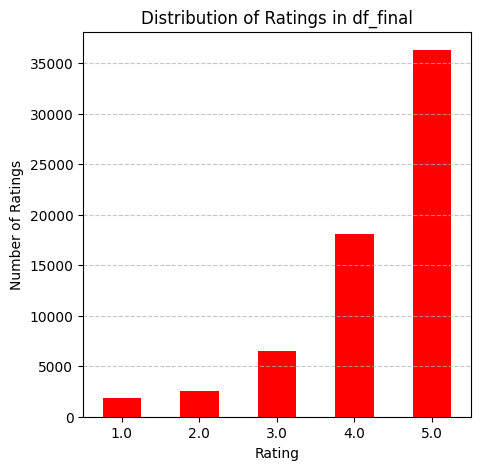

In [14]:
# Create the bar plot and provide observations

# let's reconfirm rating counts
rating_counts = df_final['rating'].value_counts().sort_index()

# let's create a bar plot to show this cleanly
plt.figure(figsize=(5, 5))
rating_counts.plot(kind='bar', color='red')
plt.title('Distribution of Ratings in df_final')
plt.xlabel('Rating')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Write your observations here: as expected from our hypothesized shape based on our summary statistics! we have a huge skew towards 5.0 - again as we trimmed out elective negative bias earlier this is likely to be expected!**

### **Checking the number of unique users and items in the dataset**

In [15]:
# Number of total rows in the data and number of unique user id and product id
# in the data

#Total rows with a print statement using a definition to store it just in case
total_rows = df_final.shape[0]
print("Total number of rows in df_final:", total_rows)

#For uniques I already did this earlier so let me drag the code lines down and
#confirm a print statement
print("1. Number of unique users:", df_final['user_id'].nunique())
print("2. Number of unique products:", df_final['prod_id'].nunique())

Total number of rows in df_final: 65290
1. Number of unique users: 1540
2. Number of unique products: 5689


**Write your observations here: we have 65,290 rows with a total of 1540 unique users and 5689 unique products, the ratio of unique products per user is 3 discrete whole number products per user with an actual value of 3.69**

### **Users with the most number of ratings**

In [16]:
# Top 10 users based on the number of ratings

#let's store a compute var of user rating counts to sort and parse by, we can
# use this in future iterations then too
user_rating_counts = df_final['user_id'].value_counts()

#let's follow the same variable storing methodology here for this specific query
# although there are multiple routes to do this
top_10_users = user_rating_counts.head(10)

#let's clean it out in a print statement
print("Top 10 Users by Number of Ratings:")
print(top_10_users)

#what are these as percentile expressions of the overall data so we can compare
#and measure them
#let's set a variable for each rating count we pulled from the high end of
# rank #1 and rank #10, #1 will serve as a code validator
rating_count_179 = 179
rating_count_295 = 295

#then let's generate a percentile rank percentage of users with rating counts
# <= the given value
percentile_179 = (user_rating_counts <= rating_count_179).mean() * 100
percentile_295 = (user_rating_counts <= rating_count_295).mean() * 100

#finally let's print those results too
print(f"Percentile rank for a rating count of {rating_count_179}: {percentile_179:.2f}%")
print(f"Percentile rank for a rating count of {rating_count_295}: {percentile_295:.2f}%")

Top 10 Users by Number of Ratings:
user_id
ADLVFFE4VBT8      295
A3OXHLG6DIBRW8    230
A1ODOGXEYECQQ8    217
A36K2N527TXXJN    212
A25C2M3QF9G7OQ    203
A680RUE1FDO8B     196
A1UQBFCERIP7VJ    193
A22CW0ZHY3NJH8    193
AWPODHOB4GFWL     184
AGVWTYW0ULXHT     179
Name: count, dtype: int64
Percentile rank for a rating count of 179: 99.42%
Percentile rank for a rating count of 295: 100.00%


**Write your observations here: the highest number of individual user ratings is 295 for user hash ADLVFFE4VBT8 and the lowest is 179 for user hash AGVWTYW0ULXHT giving a top 10 range of 116 review difference between #1 and #10 - this is relatively high as I believe i've reviewed roughly 10 restauraunts and 4 products in my life.

To deepen the relation to the data we calculate the percentile ranks of #1 and #10 to confirm our data and understand how much population #10 represents, which was the top 99.42%.**

**Now that we have explored and prepared the data, let's build the first recommendation system.**

## **Model 1: Rank Based Recommendation System**

In [17]:
# Calculate the average rating for each product
# Calculate the count of ratings for each product
product_stats = df_final.groupby('prod_id').agg(
    #group our dataframe by prod_id and aggregate the index
    average_rating=('rating', 'mean'),
    #include average rating as a mean
    rating_count=('rating', 'count')
    #include rating count as a count
).reset_index()#our current index is prod_id so let's reset that and convert
                #it back to a standard column

# Create a dataframe with calculated average and count of ratings
#set dataframe
final_rating = product_stats.copy()

# Sort the dataframe by average of ratings in the descending order
final_rating = final_rating.sort_values(by='average_rating', ascending=False)
#desecending == ascending false, value sort by our average_rating var

# See the first five records of the "final_rating" dataset
#let's use a clean print statement now that it is parsed, columnized, framed and
#descended
print("First five records of final_rating DataFrame:")
print(final_rating.head())

First five records of final_rating DataFrame:
         prod_id  average_rating  rating_count
5688  B00LGQ6HL8             5.0             5
2302  B003DZJQQI             5.0            14
3443  B005FDXF2C             5.0             7
5554  B00I6CVPVC             5.0             7
4810  B00B9KOCYA             5.0             8


In [18]:
# Defining a function to get the top n products based on the highest average
# rating and minimum interactions
def get_top_n_products(df, n, min_interactions=5): #set to 5
    """
    Top n products, from highest average rating, with min num of interactions
    -df (DataFrame), n (int) # of products, min_interactions # of minimum ratings for a product (int)
    """
    # let's import our above groupby parameters to define this (indented)
    product_stats = df.groupby('prod_id').agg(
        average_rating=('rating', 'mean'),
        rating_count=('rating', 'count')
    ).reset_index()

# Finding products with minimum number of interactions
# We will use filter
    filtered_products = product_stats[product_stats['rating_count'] >= min_interactions]
    # note the indent we are going to define all of this in the function loop

# Sorting values with respect to average rating
# let's define a top_n to return and sort average rating in a descending manner,
# let's top that off with a head and return to see our work
    top_n = filtered_products.sort_values(by='average_rating', ascending=False).head(n)
    return top_n
     # note the indent we are going to define all of this in the function loop

# Find products with exactly 5 interactions
# let's see how many are right on the cusp by relatively the same interaction at
# the value point 5
min_interaction_products = df_final.groupby('prod_id').agg(
    average_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()
min_interaction_products = min_interaction_products[min_interaction_products['rating_count'] == 5]

# let's cleanly print the results
print("Products with exactly 5 interactions:")
print(min_interaction_products[['prod_id', 'average_rating', 'rating_count']])
print("\nTop 10 products by average rating (min 5 interactions):")
print(get_top_n_products(df_final, 10, 5)[['prod_id', 'average_rating', 'rating_count']])

Products with exactly 5 interactions:
         prod_id  average_rating  rating_count
2     1400599997             4.0             5
4     B00000DM9W             5.0             5
8     B00000K135             4.8             5
9     B00000K4KH             5.0             5
16    B000021YU8             4.6             5
...          ...             ...           ...
5666  B00JZAB8OI             4.8             5
5674  B00KHA5G6G             4.4             5
5680  B00KONCDVM             4.0             5
5682  B00KXAFYZS             5.0             5
5688  B00LGQ6HL8             5.0             5

[1082 rows x 3 columns]

Top 10 products by average rating (min 5 interactions):
         prod_id  average_rating  rating_count
5688  B00LGQ6HL8             5.0             5
2302  B003DZJQQI             5.0            14
3443  B005FDXF2C             5.0             7
5554  B00I6CVPVC             5.0             7
4810  B00B9KOCYA             5.0             8
2286  B003CK10DG             5.0  

### **Recommending top 5 products with 50 minimum interactions based on popularity**

In [19]:
#let's modify the above function to meet the current parameters
#let's define a specific although lengthy var name with these pieces
#top 5 products, top_n of 5, and min interaction of 50
def get_top_n_products_by_popularity(df, n, min_interactions=50):
#note we know definitionally above how this function tends to operate
    product_stats = df.groupby('prod_id').agg(
        average_rating=('rating', 'mean'),
        rating_count=('rating', 'count')
    ).reset_index()

# Finding products with minimum number of interactions
# We will use filter
    filtered_products = product_stats[product_stats['rating_count'] >= min_interactions]

# Sorting values
# let's define a top_n to return and sort in a descending manner,
# let's top that off with a head and return to see our work
    top_n = filtered_products.sort_values(by='rating_count', ascending=False).head(n)
    return top_n
    # note the indent we are going to define all of this in the function loop

#let's call and define this new top 5
top_5_products = get_top_n_products_by_popularity(df_final, 5, 50)

#let's clean all that out witha  print statement
print("Top 5 products by popularity (min 50 interactions):")
print(top_5_products[['prod_id', 'average_rating', 'rating_count']])

Top 5 products by popularity (min 50 interactions):
         prod_id  average_rating  rating_count
4218  B0088CJT4U        4.218447           206
2316  B003ES5ZUU        4.864130           184
781   B000N99BBC        4.772455           167
4126  B007WTAJTO        4.701220           164
4180  B00829TIEK        4.436242           149


### **Recommending top 5 products with 100 minimum interactions based on popularity**

In [20]:
#let's modify the above function to meet the current parameters
#let's define a specific although lengthy var name with these pieces
#top 5 products, top_n of 5, and min interaction of 100 this time
def get_top_n_products_by_popularity(df, n, min_interactions=100):
#just change min_interactions to = 100
#note we know definitionally above how this function tends to operate
    product_stats = df.groupby('prod_id').agg(
        average_rating=('rating', 'mean'),
        rating_count=('rating', 'count')
    ).reset_index()

# Finding products with minimum number of interactions
# We will use filter
    filtered_products = product_stats[product_stats['rating_count'] >= min_interactions]

# Sorting values
# let's define a top_n to return and sort in a descending manner,
# let's top that off with a head and return to see our work
    top_n = filtered_products.sort_values(by='rating_count', ascending=False).head(n)
    return top_n
    # note the indent we are going to define all of this in the function loop

#let's call and define this new top 5
top_5_products = get_top_n_products_by_popularity(df_final, 5, 50)

#let's clean all that out witha  print statement
print("Top 5 products by popularity (min 100 interactions):")
print(top_5_products[['prod_id', 'average_rating', 'rating_count']])

Top 5 products by popularity (min 100 interactions):
         prod_id  average_rating  rating_count
4218  B0088CJT4U        4.218447           206
2316  B003ES5ZUU        4.864130           184
781   B000N99BBC        4.772455           167
4126  B007WTAJTO        4.701220           164
4180  B00829TIEK        4.436242           149


We have recommended the **top 5** products by using the popularity recommendation system. Now, let's build a recommendation system using **collaborative filtering.**

## **Model 2: Collaborative Filtering Recommendation System**

### **Building a baseline user-user similarity based recommendation system**

- Below, we are building **similarity-based recommendation systems** using `cosine` similarity and using **KNN to find similar users** which are the nearest neighbor to the given user.  
- We will be using a new library, called `surprise`, to build the remaining models. Let's first import the necessary classes and functions from this library.

In [21]:
# To compute the accuracy of models
from surprise import accuracy

# Class is used to parse a file containing ratings, data should be in structure - user ; item ; rating
from surprise.reader import Reader

# Class for loading datasets
from surprise.dataset import Dataset

# For tuning model hyperparameters
from surprise.model_selection import GridSearchCV

# For splitting the rating data in train and test datasets
from surprise.model_selection import train_test_split

# For implementing similarity-based recommendation system
from surprise.prediction_algorithms.knns import KNNBasic

# For implementing matrix factorization based recommendation system
from surprise.prediction_algorithms.matrix_factorization import SVD

# for implementing K-Fold cross-validation
from surprise.model_selection import KFold

# For implementing clustering-based recommendation system
from surprise import CoClustering

**Before building the recommendation systems, let's  go over some basic terminologies we are going to use:**

**Relevant item:** An item (product in this case) that is actually **rated higher than the threshold rating** is relevant, if the **actual rating is below the threshold then it is a non-relevant item**.  

**Recommended item:** An item that's **predicted rating is higher than the threshold is a recommended item**, if the **predicted rating is below the threshold then that product will not be recommended to the user**.  


**False Negative (FN):** It is the **frequency of relevant items that are not recommended to the user**. If the relevant items are not recommended to the user, then the user might not buy the product/item. This would result in the **loss of opportunity for the service provider**, which they would like to minimize.

**False Positive (FP):** It is the **frequency of recommended items that are actually not relevant**. In this case, the recommendation system is not doing a good job of finding and recommending the relevant items to the user. This would result in **loss of resources for the service provider**, which they would also like to minimize.

**Recall:** It is the **fraction of actually relevant items that are recommended to the user**, i.e., if out of 10 relevant products, 6 are recommended to the user then recall is 0.60. Higher the value of recall better is the model. It is one of the metrics to do the performance assessment of classification models.

**Precision:** It is the **fraction of recommended items that are relevant actually**, i.e., if out of 10 recommended items, 6 are found relevant by the user then precision is 0.60. The higher the value of precision better is the model. It is one of the metrics to do the performance assessment of classification models.

**While making a recommendation system, it becomes customary to look at the performance of the model. In terms of how many recommendations are relevant and vice-versa, below are some most used performance metrics used in the assessment of recommendation systems.**

### **Precision@k, Recall@ k, and F1-score@k**

**Precision@k** - It is the **fraction of recommended items that are relevant in `top k` predictions**. The value of k is the number of recommendations to be provided to the user. One can choose a variable number of recommendations to be given to a unique user.  


**Recall@k** - It is the **fraction of relevant items that are recommended to the user in `top k` predictions**.

**F1-score@k** - It is the **harmonic mean of Precision@k and Recall@k**. When **precision@k and recall@k both seem to be important** then it is useful to use this metric because it is representative of both of them.

### **Some useful functions**

- Below function takes the **recommendation model** as input and gives the **precision@k, recall@k, and F1-score@k** for that model.  
- To compute **precision and recall**, **top k** predictions are taken under consideration for each user.
- We will use the precision and recall to compute the F1-score.

In [22]:
def precision_recall_at_k(model, k = 10, threshold = 3.5):
    """Return precision and recall at k metrics for each user"""

    # First map the predictions to each user
    user_est_true = defaultdict(list)

    # Making predictions on the test data
    predictions = model.test(testset)

    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))

    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():

        # Sort user ratings by estimated value
        user_ratings.sort(key = lambda x: x[0], reverse = True)

        # Number of relevant items
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)

        # Number of recommended items in top k
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])

        # Number of relevant and recommended items in top k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])

        # Precision@K: Proportion of recommended items that are relevant
        # When n_rec_k is 0, Precision is undefined. Therefore, we are setting Precision to 0 when n_rec_k is 0

        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0

        # Recall@K: Proportion of relevant items that are recommended
        # When n_rel is 0, Recall is undefined. Therefore, we are setting Recall to 0 when n_rel is 0

        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0

    # Mean of all the predicted precisions are calculated.
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)

    # Mean of all the predicted recalls are calculated.
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)

    accuracy.rmse(predictions)

    print('Precision: ', precision) # Command to print the overall precision

    print('Recall: ', recall) # Command to print the overall recall

    print('F_1 score: ', round((2*precision*recall)/(precision+recall), 3)) # Formula to compute the F-1 score

**Hints:**

- To compute **precision and recall**, a **threshold of 3.5 and k value of 10 can be considered for the recommended and relevant ratings**.
- Think about the performance metric to choose.

Below we are loading the **`rating` dataset**, which is a **pandas DataFrame**, into a **different format called `surprise.dataset.DatasetAutoFolds`**, which is required by this library. To do this, we will be **using the classes `Reader` and `Dataset`.**

In [23]:
#imports check for my own flow
from surprise import Reader, Dataset
from surprise.model_selection import train_test_split

# Instantiating Reader scale with expected rating scale
# set our scale although it is float we have only seen whole integers per obser
reader = Reader(rating_scale=(1, 5))

# Loading the rating dataset
# set our data load from our final dataframe based on the columns we assigned
data = Dataset.load_from_df(df_final[['user_id', 'prod_id', 'rating']], reader)

# Splitting the data into train and test datasets
# use trainset and testset to control the proportion of training and testing data size,
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
#reproducibility state set, 80/20 train-test split for KNN which provides
#RMSE, Precision@10, Recall@10, Threshhold 3.5 as required

Now, we are **ready to build the first baseline similarity-based recommendation system** using the cosine similarity.

### **Building the user-user Similarity-based Recommendation System**

In [24]:
#check imports
from surprise import KNNBasic
from collections import defaultdict

# Declaring the similarity options
sim_options = {
    'name': 'cosine',
    'user_based': True
}
# we were asked to use cosine and for KNN nearest that is user based


# Initialize the KNNBasic model using sim_options declared, Verbose = False, and setting random_state = 1
model = KNNBasic(sim_options=sim_options, verbose=False, random_state=1)
#KNNBasic model loading our sim options and setting a reproducibility state

# Fit the model on the training data
model.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score using the precision_recall_at_k function defined above
def precision_recall_at_k(model, k=10, threshold=3.5):  #parameters input
    """Return precision and recall at k metrics for each user"""
    user_est_true = defaultdict(list)  #userlist
    predictions = model.test(testset)  #predictions
    for uid, _, true_r, est, _ in predictions:  #looping through predictions
        user_est_true[uid].append((est, true_r)) #appending to userlist
    precisions = dict() #precision dictionary
    recalls = dict() #recall dictionary
    for uid, user_ratings in user_est_true.items(): #looping through userlist
        user_ratings.sort(key=lambda x: x[0], reverse=True) #sorting user key
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings) #rel
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k]) #k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))#r/k
                              for (est, true_r) in user_ratings[:k]) #for loop
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0 #prc
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0 #recall
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)
    #precision and count
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    #recall and count
    print('Precision: ', precision) #print result precision
    print('Recall: ', recall) #print result recall
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3) if (precision + recall) != 0 else 0)
    # finally, print f_1 score, rounded

precision_recall_at_k(model) #end

Precision:  0.855
Recall:  0.858
F_1 score:  0.856


**Write your observations here:
Let's analyze these results.

Precision of 85.5% indicates that 85.5% of recommendations are precise or worth listening to system suggestion - this is minimized for false positives. This means that our model compares well to standard data.

A recall of 85.8% indicates that when testing the model, 85.8% of the relevant top 10 recommendations were items in the real scenario that the user actually rated greater than or equal to 3.5 - this means that our model compares well to real instances.

Our F_1 score will show our harmonic mean or the relationship between precision and recall in this situation. If our value was too close to 1 then it would indicate that it trades precision for recall. Here it is relatively high but not 1 so we can state that it is relatively well-balanced with a slight favoring towards precision.

Overall it seems to have a high standard of precision and recall that can be fine tuned. This also indicates that within our data environment the model of user-user similarity is a good metric for user analysis in this case. The model is slightly conservative favoring precision.

I will note again that we've created a skew based on user satisfaction and not on total data, but this insight is still helpful and even useful for being more specific about those populations when compared to larger total datasets.

I am interested to see if the hybridization of this model will lead to better results, I would presume it would.**

Let's now **predict rating for a user with `userId=A3LDPF5FMB782Z` and `productId=1400501466`** as shown below. Here the user has already interacted or watched the product with productId '1400501466' and given a rating of 5.

In [35]:
# Predicting rating for a sample user with an interacted product

#let's define based on the params
user_id = 'A3LDPF5FMB782Z'
prod_id = '1400501466'

#let's use the trained KNNBasic model to run the prediction
predicted_rating = model.predict(user_id, prod_id)

# let's print that clean as the predicted rating and actual rating
print(f"Predicted rating for user {user_id} and product {prod_id}: {predicted_rating.est:.2f}")
print(f"Actual rating: 5")

Predicted rating for user A3LDPF5FMB782Z and product 1400501466: 3.40
Actual rating: 5


**Write your observations here: Here we have a difference between the predicted rating and the actual rating of 1.6, which is relatively high for this context and a false negative interaction // is relevant but was not recommended. The model severely underestimated the user's preference in this instance. This means, for this specific product, our model struggles to understand user preference. This is likely because we are using KNN nearest neighbors and our model seems to be relatively conservative. This highlights a limitation for this model and type of model when there isn't enough data or binding data between products and users. This could also just arise from a mismatch in preference that can occur with nearest neighbors. The model matrix could have sparsity - few users rating that product. The model may have a cold start issue based on the number of ratings from that particular user so far. The model may meet an unavoidable but always fought nuance of user preference divergence where increasingly unique tastes and niche products leads to poor neighbor represntation under KNN. This implies the model needs to be changed or negative externalities could occur for the business.**

Below is the function to find the **list of users who have not seen the product with product id "1400501466"**.

In [26]:
def n_users_not_interacted_with(n, data, prod_id):
    users_interacted_with_product = set(data[data['prod_id'] == prod_id]['user_id'])
    all_users = set(data['user_id'])
    return list(all_users.difference(users_interacted_with_product))[:n] # where n is the number of elements to get in the list

In [27]:
# Find unique user_id where prod_id is not equal to "1400501466"
n_users_not_interacted_with(5, df_final, '1400501466')

['A2Y3WWPUKIJ59I',
 'A38KK0SZYEH5UD',
 'A3CW0ZLUO5X2B1',
 'A33152QEGO2MZN',
 'A233TZONT1OGR0']

**Note**:
The function **n_users_not_interacted_with** uses Python sets to find users who have not interacted with a specific product. Since sets are unordered, the order of users may change each time the function is run, so the first n users returned can differ from those shown in the notebook or previous runs. This variation is expected and not a mistake. Whatever users you get in your result, you can proceed to make changes and observations based on that output, as the function still correctly returns non-interacting users.

* It can be observed from the above list that **user "A2UOHALGF2X77Q" has not seen the product with productId "1400501466"** as this user id is a part of the above list.

**Below we are predicting rating for `userId=A2UOHALGF2X77Q` and `prod_id=1400501466`.**

In [34]:
# Predicting rating for a sample user with a non interacted product

#set our user_id and prod_id
user_id = 'A2UOHALGF2X77Q'
prod_id = '1400501466'

#call on KNN Basic model with params input
predicted_rating = model.predict(user_id, prod_id)

# clean out our assessment in a print statement
print(f"Predicted rating for user {user_id} and product {prod_id}: {predicted_rating.est:.2f}")

Predicted rating for user A2UOHALGF2X77Q and product 1400501466: 4.29


**Write your observations here: We confirmed the user did not rate the product yet and then found their KNNbasic predictor to be a 5.0 star rating for the given item. We know the model currently underestimates user preference and should do more testing.**

### **Improving similarity-based recommendation system by tuning its hyperparameters**

Below, we will be tuning hyperparameters for the `KNNBasic` algorithm. Let's try to understand some of the hyperparameters of the KNNBasic algorithm:

- **k** (int) – The (max) number of neighbors to take into account for aggregation. Default is 40.
- **min_k** (int) – The minimum number of neighbors to take into account for aggregation. If there are not enough neighbors, the prediction is set to the global mean of all ratings. Default is 1.
- **sim_options** (dict) – A dictionary of options for the similarity measure. And there are four similarity measures available in surprise -
    - cosine
    - msd (default)
    - Pearson
    - Pearson baseline

In [29]:
# Setting up parameter grid to tune the hyperparameters
#import check
from surprise import KNNBasic
from surprise.model_selection import GridSearchCV
#building parameter grid, using above params and measures
param_grid = {
    'k': [20, 40, 60],
    'min_k': [1, 3, 5],
    'sim_options': {
        'name': ['cosine', 'msd', 'pearson', 'pearson_baseline'],
        'user_based': [True]
    }
}

# Performing 3-fold cross-validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Best RMSE score
# Combination of parameters that gave the best RMSE score
# We can handle this in one results print interaction
print(f"Best RMSE score: {gs.best_score['rmse']:.3f}")
print("Best parameters:")
print(f"  k: {gs.best_params['rmse']['k']}")
print(f"  min_k: {gs.best_params['rmse']['min_k']}")
print(f"  sim_options: {gs.best_params['rmse']['sim_options']}")


Best RMSE score: 0.970
Best parameters:
  k: 60
  min_k: 5
  sim_options: {'name': 'cosine', 'user_based': True}


Once the grid search is **complete**, we can get the **optimal values for each of those hyperparameters**.

Now, let's build the **final model by using tuned values of the hyperparameters**, which we received by using **grid search cross-validation**.

In [37]:
# Using the optimal similarity measure for user-user based collaborative filtering
#let's pull these from our above output
sim_options = {'name': 'cosine', 'user_based': True}

# Creating an instance of KNNBasic with optimal hyperparameter values
# we will pull k, min_k, our sim option term above and set a reproducibility state
model = KNNBasic(k=60, min_k=5, sim_options=sim_options, verbose=False, random_state=1)

# Training the algorithm on the trainset
model.fit(trainset)

# Let us compute precision@k and recall@k also with k =10
def precision_recall_at_k(model, k=10, threshold=3.5):
    """
    Returns precision and recall at k metrics for each user value input
    """
    user_est_true = defaultdict(list) #userlist
    predictions = model.test(testset) #predictionlist
    for uid, _, true_r, est, _ in predictions: #prediction loop
        user_est_true[uid].append((est, true_r)) #user append
    precisions = dict() #prec dict
    recalls = dict() #recall dict
    for uid, user_ratings in user_est_true.items(): #userloop
        user_ratings.sort(key=lambda x: x[0], reverse=True) #user sort
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings) #nrel
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k]) #k
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold)) #x2
                              for (est, true_r) in user_ratings[:k]) #in user
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0 #if p
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0 #if r
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    # then we print the results
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3) if (precision + recall) != 0 else 0)

# finally call the model for evaluation
precision_recall_at_k(model)


Precision:  0.849
Recall:  0.893
F_1 score:  0.87


**Write your observations here: After tuning with hyperparameters we observe that we have traded an increase in recall for a very small decrease in precision. This means that products for our previous user are less likely to be missed but that some more irrelevant items may get recommended. Our F_1 score also improved between recall and precision showing that we have further balanced accuracy and completeness with this change. It is also worth noting that the RMSE itself was at a solid level.

Including more neighbors to 60 gave us a better grasp of user preference. Increasing the minimum neighbors to 5 also decreased the reliance on global or total stats for new or under-reviewed products. **

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [42]:
# Use sim_user_user_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId 1400501466

# Re-train baseline model
baseline_sim_options = {'name': 'cosine', 'user_based': True}
baseline_model = KNNBasic(k=40, min_k=1, sim_options=baseline_sim_options, verbose=False, random_state=1)
baseline_model.fit(trainset)

# set user and prod ID
user_id = 'A3LDPF5FMB782Z'
prod_id = '1400501466'

# Use the optimized KNNBasic model
optimized_pred = model.predict(user_id, prod_id)

# Baseline model prediction
baseline_pred = baseline_model.predict(user_id, prod_id)

#Print compare
print(f"Baseline model - Predicted rating for user {user_id} and prod_id {prod_id}: {baseline_pred.est:.2f}")
print(f"Optimized model - Predicted rating for user {user_id} and prod_id {prod_id}: {optimized_pred.est:.2f}")
print(f"Actual rating: 5")


Baseline model - Predicted rating for user A3LDPF5FMB782Z and prod_id 1400501466: 3.40
Optimized model - Predicted rating for user A3LDPF5FMB782Z and prod_id 1400501466: 3.40
Actual rating: 5


In [73]:
# Use sim_user_user_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"

# Re-train baseline model
baseline_sim_options = {'name': 'cosine', 'user_based': True}
baseline_model = KNNBasic(k=40, min_k=1, sim_options=baseline_sim_options, verbose=False, random_state=1)
baseline_model.fit(trainset)

# set user and prod ID
user_id = 'A2UOHALGF2X77Q'
prod_id = '1400501466'

# Use the optimized KNNBasic model
optimized_pred = model.predict(user_id, prod_id)

# Baseline model prediction
baseline_pred = baseline_model.predict(user_id, prod_id)

# Print comparison
print(f"Baseline model - Predicted rating for user {user_id} and prod_id {prod_id}: {baseline_pred.est:.2f}")
print(f"Optimized model - Predicted rating for user {user_id} and prod_id {prod_id}: {optimized_pred.est:.2f}")
print(f"Actual rating: N/A")

Baseline model - Predicted rating for user A2UOHALGF2X77Q and prod_id 1400501466: 5.00
Optimized model - Predicted rating for user A2UOHALGF2X77Q and prod_id 1400501466: 4.29
Actual rating: N/A


**Write your observations here: Our original predictor was 3.4 for A3 user and remained 3.4 after optimizing. This still sharply differs from the actual rating of 5.0 - the predictor for A2 dropped from 5.0 to 4.29 - as we know the model is slightly more tuned it is accruate to say this is a closer approximation, but still needs work and is not very certain.**

### **Identifying similar users to a given user (nearest neighbors)**

We can also find out **similar users to a given user** or its **nearest neighbors** based on this KNNBasic algorithm. Below, we are finding the 5 most similar users to the first user in the list with internal id 0, based on the `msd` distance metric.

In [46]:
# 0 is the inner id of the above user

#import check
from surprise import KNNBasic

# Create KNNBasic model but this time with MSD similarity
sim_options_msd = {'name': 'msd', 'user_based': True}
model_msd = KNNBasic(k=60, min_k=5, sim_options=sim_options_msd, verbose=False, random_state=1)
model_msd.fit(trainset)

# Pull the 5 most similar users to our internal id 0
similar_users_internal = model_msd.get_neighbors(0, k=5)

# Convert internal IDs to raw user IDs for legibility
similar_user_ids = [model_msd.trainset.to_raw_uid(iid) for iid in similar_users_internal]

# Print results in a clean statement
print(f"5 most similar users to internal id 0 (using MSD): {similar_user_ids}")

5 most similar users to internal id 0 (using MSD): ['A16J281SJ9QXIQ', 'A3CJ7MHAS9IMAM', 'A2L0F2T1DLTNT8', 'AYMD77ITD15PT', 'A21I62TCDL4754']


### **Implementing the recommendation algorithm based on optimized KNNBasic model**

Below we will be implementing a function where the input parameters are:

- data: A **rating** dataset
- user_id: A user id **against which we want the recommendations**
- top_n: The **number of products we want to recommend**
- algo: the algorithm we want to use **for predicting the ratings**
- The output of the function is a **set of top_n items** recommended for the given user_id based on the given algorithm

In [47]:
def get_recommendations(data, user_id, top_n, algo):

    # Creating an empty list to store the recommended product ids
    recommendations = []

    # Creating an user item interactions matrix
    user_item_interactions_matrix = data.pivot(index = 'user_id', columns = 'prod_id', values = 'rating')

    # Extracting those product ids which the user_id has not interacted yet
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Looping through each of the product ids which user_id has not interacted yet
    for item_id in non_interacted_products:

        # Predicting the ratings for those non interacted product ids by this user
        est = algo.predict(user_id, item_id).est

        # Appending the predicted ratings
        recommendations.append((item_id, est))

    # Sorting the predicted ratings in descending order
    recommendations.sort(key = lambda x: x[1], reverse = True)

    return recommendations[:top_n] # Returing top n highest predicted rating products for this user

**Predicting top 5 products for userId = "A3LDPF5FMB782Z" with similarity based recommendation system**

In [49]:
# Making top 5 recommendations for user_id "A3LDPF5FMB782Z" with a similarity-based recommendation engine

# safe define our optimized function
sim_options = {'name': 'cosine', 'user_based': True}
sim_user_user_optimized = KNNBasic(k=60, min_k=5, sim_options=sim_options, verbose=False, random_state=1)
sim_user_user_optimized.fit(trainset)

#start with our above defined function

def get_recommendations(data, user_id, top_n, algo):
    # Create an empty list to store the recommended product IDs
    recommendations = []

    # Create user-item interactions matrix
    user_item_interactions_matrix = data.pivot(index='user_id', columns='prod_id', values='rating')

    # Extract product IDs the user has not interacted with
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Predict ratings for non-interacted products
    for prod_id in non_interacted_products:
        est = algo.predict(user_id, prod_id).est
        recommendations.append((prod_id, est))

    # Sort by predicted rating in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n]

# Now we can grab the
# top 5 recommendations for user A3LDPF5FMB782Z using optimized model
# let's set our user id and top n params as well as sim system and df
user_id = 'A3LDPF5FMB782Z'
top_n = 5
recommendations = get_recommendations(df_final, user_id, top_n, sim_user_user_optimized)

# Let's print the results in a clean output using a for loop
print(f"Top {top_n} recommendations for user {user_id}:")
for prod_id, rating in recommendations:
    print(f"Product ID: {prod_id}, Predicted Rating: {rating:.2f}")

Top 5 recommendations for user A3LDPF5FMB782Z:
Product ID: B000067RT6, Predicted Rating: 5.00
Product ID: B000BQ7GW8, Predicted Rating: 5.00
Product ID: B001ENW61I, Predicted Rating: 5.00
Product ID: B001TH7GUU, Predicted Rating: 5.00
Product ID: B001TH7T2U, Predicted Rating: 5.00


In [50]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"

# Build DataFrame with columns prod_id and predicted_ratings as requested
recommendations_df = pd.DataFrame(recommendations, columns=['prod_id', 'predicted_ratings'])

# Print DataFrame to check
print(f"Top {top_n} recommendations for user {user_id}:")
print(recommendations_df)

Top 5 recommendations for user A3LDPF5FMB782Z:
      prod_id  predicted_ratings
0  B000067RT6                  5
1  B000BQ7GW8                  5
2  B001ENW61I                  5
3  B001TH7GUU                  5
4  B001TH7T2U                  5


### **Item-Item Similarity-based Collaborative Filtering Recommendation System**

* Above we have seen **similarity-based collaborative filtering** where similarity is calculated **between users**. Now let us look into similarity-based collaborative filtering where similarity is seen **between items**.

In [51]:
# Declaring the similarity options
#item-item
sim_options = {'name': 'cosine', 'user_based': False}

# KNN algorithm is used to find desired similar items. Use random_state=1
item_item_model = KNNBasic(k=60, min_k=5, sim_options=sim_options, verbose=False, random_state=1)

# Train the algorithm on the trainset, and predict ratings for the test set
item_item_model.fit(trainset)

# Let us compute precision@k, recall@k, and f_1 score with k = 10
# Compute precision@k, recall@k, and F1-score@k with k=10
def precision_recall_at_k(model, k=10, threshold=3.5):
#i've notated this 100 times now so you know I know how this works
    """
    Return precision and recall
    at k metrics for each user
    """
    user_est_true = defaultdict(list)
    predictions = model.test(testset)
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F_1 score: ', round((2 * precision * recall) / (precision + recall), 3) if (precision + recall) != 0 else 0)

# Evaluate the item-item model as result
precision_recall_at_k(item_item_model)


Precision:  0.836
Recall:  0.876
F_1 score:  0.856


**Write your observations here: The optimized user-user model’s superior performance indicates user similarities are stronger in this dataset than this untuned item-item model which has less precision, recall, and harmonics than the optimized model previously.**

Let's now **predict a rating for a user with `userId = A3LDPF5FMB782Z` and `prod_Id = 1400501466`** as shown below. Here the user has already interacted or watched the product with productId "1400501466".

In [52]:
# Predicting rating for a sample user with an interacted product

# set params
user_id = 'A3LDPF5FMB782Z'
prod_id = '1400501466'

# Retrieve actual rating from df_final to compare
actual_rating = df_final[(df_final['user_id'] == user_id) & (df_final['prod_id'] == prod_id)]['rating']

# Predict rating using item-item KNNBasic model
predicted_rating = item_item_model.predict(user_id, prod_id)

# Print results
print(f"Item-item model - Predicted rating for user {user_id} and prod_id {prod_id}: {predicted_rating.est:.2f}")
print(f"Actual rating: {actual_rating.iloc[0]:.2f}" if not actual_rating.empty else f"No actual rating exists for user {user_id} and prod_id {prod_id}")
#expanding good practice for if although we checked for missing data at start

Item-item model - Predicted rating for user A3LDPF5FMB782Z and prod_id 1400501466: 4.27
Actual rating: 5.00


**Write your observations here: Although we know the model is technically less precise and has worse recall than the optimized model item-item comparison seems to handle the data sparsity better, driving our result to a 0.73 difference as opposed to the previous 1.6 - this data could be circumstantial and more tuning and analysis is still needed.**

Below we are **predicting rating for the `userId = A2UOHALGF2X77Q` and `prod_id = 1400501466`**.

In [53]:
# Predicting rating for a sample user with a non interacted product

# set params
user_id = 'A2UOHALGF2X77Q'
prod_id = '1400501466'

# Predict rating using item-item KNNBasic model
predicted_rating = item_item_model.predict(user_id, prod_id)

# Print results
print(f"Item-item model - Predicted rating for user {user_id} and prod_id {prod_id}: {predicted_rating.est:.2f}")
print(f"Actual rating: None (user has not interacted with this product)")

Item-item model - Predicted rating for user A2UOHALGF2X77Q and prod_id 1400501466: 4.29
Actual rating: None (user has not interacted with this product)


**Write your observations here: Our prediction matches the global mean which is a coincidence or highly suggestive of data sparsity or a lack of relevant items, it is above 3.5 and would be recommended.**

### **Hyperparameter tuning the item-item similarity-based model**
- Use the following values for the param_grid and tune the model.
  - 'k': [10, 20, 30]
  - 'min_k': [3, 6, 9]
  - 'sim_options': {'name': ['msd', 'cosine']
  - 'user_based': [False]
- Use GridSearchCV() to tune the model using the 'rmse' measure
- Print the best score and best parameters

In [54]:
# Setting up parameter grid to tune the hyperparameters
# as we did before and as above
param_grid = {
    'k': [10, 20, 30],
    'min_k': [3, 6, 9],
    'sim_options': {
        'name': ['msd', 'cosine'],
        'user_based': [False]
    }
}

# Performing 3-fold cross validation to tune the hyperparameters
gs = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fitting the data
gs.fit(data)

# Find the best RMSE score
best_rmse = gs.best_score['rmse']

# Find the combination of parameters that gave the best RMSE score
best_params = gs.best_params['rmse']

# Print results for clean view
print(f"Best RMSE score: {best_rmse:.3f}")
print("Best parameters:")
print(f"  k: {best_params['k']}")
print(f"  min_k: {best_params['min_k']}")
print(f"  sim_options: {best_params['sim_options']}")

#takes a bit


Best RMSE score: 0.975
Best parameters:
  k: 20
  min_k: 6
  sim_options: {'name': 'msd', 'user_based': False}


Once the **grid search** is complete, we can get the **optimal values for each of those hyperparameters as shown above.**

Now let's build the **final model** by using **tuned values of the hyperparameters** which we received by using grid search cross-validation.

### **Use the best parameters from GridSearchCV to build the optimized item-item similarity-based model. Compare the performance of the optimized model with the baseline model.**

In [56]:
# Using the optimal similarity measure for item-item based collaborative filtering

# import check
from surprise import KNNBasic
from surprise.accuracy import rmse
from collections import defaultdict

# Use optimal similarity measure as above
sim_options = {'name': 'msd', 'user_based': False}

# Creating an instance of KNNBasic with optimal hyperparameter values
optimized_item_item_model = KNNBasic(k=20, min_k=6, sim_options=sim_options, verbose=False, random_state=1)

# Training the algorithm on the trainset
optimized_item_item_model.fit(trainset)

# Let us compute precision@k and recall@k, f1_score and RMSE
def precision_recall_at_k(model, k=10, threshold=3.5):
    """
    Return precision, recall, and F1-score at k metrics for each user
    """
    user_est_true = defaultdict(list)
    predictions = model.test(testset)

    # Compute RMSE
    rmse_score = rmse(predictions, verbose=False)

    # Compute precision and recall
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    f1_score = round((2 * precision * recall) / (precision + recall), 3) if (precision + recall) != 0 else 0

    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F_1 score: ', f1_score)
    print('RMSE: ', round(rmse_score, 3))

# Evaluate the optimized item-item model
print("Optimized Item-Item Model Performance:")
precision_recall_at_k(optimized_item_item_model)

# let's appendn this with a direct comparison to baseline performance to observe
baseline_sim_options = {'name': 'cosine', 'user_based': False}
baseline_item_item_model = KNNBasic(k=60, min_k=5, sim_options=baseline_sim_options, verbose=False, random_state=1)
baseline_item_item_model.fit(trainset)
print("\nBaseline Item-Item Model Performance:")
precision_recall_at_k(baseline_item_item_model)


Optimized Item-Item Model Performance:
Precision:  0.839
Recall:  0.88
F_1 score:  0.859
RMSE:  0.958

Baseline Item-Item Model Performance:
Precision:  0.836
Recall:  0.876
F_1 score:  0.856
RMSE:  0.961


**Write your observations here: We increased Precision by 0.3%, we increased recall by 0.4%, and we raised the f-score 0.003 - however, the RMSE score lowered. This RMSE is still behind the user-user optimized value indicating users still have a stronger sway on data than items. **

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [59]:
# Use sim_item_item_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"

#import check
import pandas as pd
from surprise import KNNBasic

# Re-train check
baseline_sim_options = {'name': 'cosine', 'user_based': False}
baseline_item_item_model = KNNBasic(k=60, min_k=5, sim_options=baseline_sim_options, verbose=False, random_state=1)
baseline_item_item_model.fit(trainset)

# params
user_id1 = 'A3LDPF5FMB782Z'
prod_id = '1400501466'

# Retrieve actual rating from df_final
actual_rating = df_final[(df_final['user_id'] == user_id1) & (df_final['prod_id'] == prod_id)]['rating']

# Baseline model prediction
baseline_pred1 = baseline_item_item_model.predict(user_id1, prod_id)

# Optimized model prediction
optimized_pred1 = optimized_item_item_model.predict(user_id1, prod_id)

# Print results in clean statement
print(f"\nUser {user_id1} and prod_id {prod_id}:")
print(f"Baseline item-item model - Predicted rating: {baseline_pred1.est:.2f}")
print(f"Optimized item-item model - Predicted rating: {optimized_pred1.est:.2f}")
print(f"Actual rating: {actual_rating.iloc[0]:.2f}" if not actual_rating.empty else f"No actual rating exists")



User A3LDPF5FMB782Z and prod_id 1400501466:
Baseline item-item model - Predicted rating: 4.27
Optimized item-item model - Predicted rating: 4.71
Actual rating: 5.00


In [60]:
# Use sim_item_item_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"

# params
user_id2 = 'A2UOHALGF2X77Q'

# Baseline model prediction
baseline_pred2 = baseline_item_item_model.predict(user_id2, prod_id)

# Optimized model prediction
optimized_pred2 = optimized_item_item_model.predict(user_id2, prod_id)

# Print results for A2UOHALGF2X77Q
print(f"\nUser {user_id2} and prod_id {prod_id}:")
print(f"Baseline item-item model - Predicted rating: {baseline_pred2.est:.2f}")
print(f"Optimized item-item model - Predicted rating: {optimized_pred2.est:.2f}")
print(f"Actual rating: None (user has not interacted with this product)")


User A2UOHALGF2X77Q and prod_id 1400501466:
Baseline item-item model - Predicted rating: 4.29
Optimized item-item model - Predicted rating: 4.29
Actual rating: None (user has not interacted with this product)


**Write your observations here: The improved rating of 4.71 is our closest yet to actual rating and a 60% reduction in error from the baseline. We see as well that the other predictor again matches the global mean due to sparsity or lack of near comparison - the fact that this didn't change with tuning makes this even more so the case for this specific product.**

### **Identifying similar items to a given item (nearest neighbors)**

We can also find out **similar items** to a given item or its nearest neighbors based on this **KNNBasic algorithm**. Below we are finding the 5 most similar items to the item with internal id 0 based on the `msd` distance metric.

In [61]:
# model confirm
sim_options_msd = {'name': 'msd', 'user_based': False}
item_item_model_msd = KNNBasic(k=20, min_k=6, sim_options=sim_options_msd, verbose=False, random_state=1)
item_item_model_msd.fit(trainset)

# Get 5 most similar items to internal id 0
similar_items_internal = item_item_model_msd.get_neighbors(0, k=5)

# Convert internal IDs to raw product IDs
similar_item_ids = [item_item_model_msd.trainset.to_raw_iid(iid) for iid in similar_items_internal]

# Print results
print(f"5 most similar items to internal id 0 (using MSD): {similar_item_ids}")

5 most similar items to internal id 0 (using MSD): ['B008X9Z3UC', 'B003ZSHKJ8', 'B003LSTD38', 'B005EOWBKE', 'B004IZN3WU']


**Predicting top 5 products for userId = "A1A5KUIIIHFF4U" with similarity based recommendation system.**

**Hint:** Use the get_recommendations() function.

In [63]:
# Making top 5 recommendations for user_id A1A5KUIIIHFF4U with similarity-based recommendation engine.

def get_recommendations(data, user_id, top_n, algo):
    # Create an empty list to store the recommended product IDs
    recommendations = []

    # Create user-item interactions matrix
    user_item_interactions_matrix = data.pivot(index='user_id', columns='prod_id', values='rating')

    # Extract product IDs the user has not interacted with
    non_interacted_products = user_item_interactions_matrix.loc[user_id][user_item_interactions_matrix.loc[user_id].isnull()].index.tolist()

    # Predict ratings for non-interacted products
    for prod_id in non_interacted_products:
        est = algo.predict(user_id, prod_id).est
        recommendations.append((prod_id, est))

    # Sort by predicted rating in descending order
    recommendations.sort(key=lambda x: x[1], reverse=True)

    return recommendations[:top_n]

# Get top 5 recommendations and params
user_id = 'A1A5KUIIIHFF4U'
top_n = 5
recommendations = get_recommendations(df_final, user_id, top_n, optimized_item_item_model)

# Print results
print(f"Top {top_n} recommendations for user {user_id}:")
for prod_id, rating in recommendations:
    print(f"Product ID: {prod_id}, Predicted Rating: {rating:.2f}")

Top 5 recommendations for user A1A5KUIIIHFF4U:
Product ID: 1400532655, Predicted Rating: 4.29
Product ID: 1400599997, Predicted Rating: 4.29
Product ID: 9983891212, Predicted Rating: 4.29
Product ID: B00000DM9W, Predicted Rating: 4.29
Product ID: B00000J1V5, Predicted Rating: 4.29


In [64]:
# Building the dataframe for above recommendations with columns "prod_id" and "predicted_ratings"
recommendations_df = pd.DataFrame(recommendations, columns=['prod_id', 'predicted_ratings'])

# Print DataFrame
print(f"Top {top_n} recommendations for user {user_id}:")
print(recommendations_df)

Top 5 recommendations for user A1A5KUIIIHFF4U:
      prod_id  predicted_ratings
0  1400532655           4.292024
1  1400599997           4.292024
2  9983891212           4.292024
3  B00000DM9W           4.292024
4  B00000J1V5           4.292024


Now as we have seen **similarity-based collaborative filtering algorithms**, let us now get into **model-based collaborative filtering algorithms**.

### **Model 3: Model-Based Collaborative Filtering - Matrix Factorization**

Model-based Collaborative Filtering is a **personalized recommendation system**, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. We use **latent features** to find recommendations for each user.

### Singular Value Decomposition (SVD)

SVD is used to **compute the latent features** from the **user-item matrix**. But SVD does not work when we **miss values** in the **user-item matrix**.

In [65]:
# Using SVD matrix factorization. Use random_state = 1
svd_model = SVD(random_state=1)

# Training the algorithm on the trainset
svd_model.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
def precision_recall_at_k(model, k=10, threshold=3.5):
    """Return precision, recall, and F1-score at k metrics for each user"""
    user_est_true = defaultdict(list)
    predictions = model.test(testset)

    # Compute RMSE
    rmse_score = rmse(predictions, verbose=False)

    # Compute precision and recall
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    f1_score = round((2 * precision * recall) / (precision + recall), 3) if (precision + recall) != 0 else 0

    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F_1 score: ', f1_score)
    print('RMSE: ', round(rmse_score, 3))

# Evaluate the SVD model
print("SVD Model Performance:")
precision_recall_at_k(svd_model)


SVD Model Performance:
Precision:  0.853
Recall:  0.88
F_1 score:  0.866
RMSE:  0.888


**Write your observations here:
For precision it is only below the baseline user-user model.
Recall matches optimized items but is below optimized users.
F_1 score is only beaten out by optimized users.
The highest RMSE yet and at scaled significance performs better.

Incorporating latent factors seems to improve accuracy.**

**Let's now predict the rating for a user with `userId = "A3LDPF5FMB782Z"` and `prod_id = "1400501466`.**

In [66]:
# Making prediction
# params
user_id = 'A3LDPF5FMB782Z'
prod_id = '1400501466'

# Retrieve actual rating from df_final
actual_rating = df_final[(df_final['user_id'] == user_id) & (df_final['prod_id'] == prod_id)]['rating']

# Predict rating using SVD model
predicted_rating = svd_model.predict(user_id, prod_id)

# Print results
print(f"SVD model - Predicted rating for user {user_id} and prod_id {prod_id}: {predicted_rating.est:.2f}")
print(f"Actual rating: {actual_rating.iloc[0]:.2f}" if not actual_rating.empty else f"No actual rating exists")

SVD model - Predicted rating for user A3LDPF5FMB782Z and prod_id 1400501466: 4.08
Actual rating: 5.00


**Write your observations here: The prediciton error is lower than all models except for optimized item-item which is more accurate in this instance. SVD works better than user-user models but not as well as optimized item-item for this product.**

**Below we are predicting rating for the `userId = "A2UOHALGF2X77Q"` and `productId = "1400501466"`.**

In [67]:
# set params
user_id = 'A2UOHALGF2X77Q'
prod_id = '1400501466'

# Predict rating using SVD model
predicted_rating = svd_model.predict(user_id, prod_id)

# Print results
print(f"SVD model - Predicted rating for user {user_id} and prod_id {prod_id}: {predicted_rating.est:.2f}")
print(f"Actual rating: None (user has not interacted with this product)")

SVD model - Predicted rating for user A2UOHALGF2X77Q and prod_id 1400501466: 4.16
Actual rating: None (user has not interacted with this product)


**Write your observations here: Slightly below our global mean this time suggesting the result isn't directly from sparsity or a more conservative prediction. Likely an under prediction from SVD limitations based on our other data points.**

### **Improving Matrix Factorization based recommendation system by tuning its hyperparameters**

Below we will be tuning only three hyperparameters:
- **n_epochs**: The number of iterations of the SGD algorithm.
- **lr_all**: The learning rate for all parameters.
- **reg_all**: The regularization term for all parameters.

In [68]:
# Set the parameter space to tune
param_grid = {
    'n_epochs': [10, 20, 30],
    'lr_all': [0.002, 0.005, 0.01],
    'reg_all': [0.02, 0.1, 0.2]
}

# Perform 3-fold gridsearch cross-validation
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3, n_jobs=-1)

# Fit the data
gs.fit(data)

# Best RMSE score
best_rmse = gs.best_score['rmse']

# Combination of parameters that gave the best RMSE score
best_params = gs.best_params['rmse']

# Print results
print(f"Best RMSE score: {best_rmse:.3f}")
print("Best parameters:")
print(f"  n_epochs: {best_params['n_epochs']}")
print(f"  lr_all: {best_params['lr_all']}")
print(f"  reg_all: {best_params['reg_all']}")

Best RMSE score: 0.898
Best parameters:
  n_epochs: 30
  lr_all: 0.01
  reg_all: 0.2


Now, we will **the build final model** by using **tuned values** of the hyperparameters, which we received using grid search cross-validation above.

In [70]:
# Build the optimized SVD model using optimal hyperparameter search. Use random_state=1
optimized_svd_model = SVD(n_epochs=best_params['n_epochs'], lr_all=best_params['lr_all'], reg_all=best_params['reg_all'], random_state=1)

# Train the algorithm on the trainset
optimized_svd_model.fit(trainset)

# Use the function precision_recall_at_k to compute precision@k, recall@k, F1-Score, and RMSE
def precision_recall_at_k(model, k=10, threshold=3.5):
    """
    Return precision, recall, and F1-score at k metrics for each user
    """
    user_est_true = defaultdict(list)
    predictions = model.test(testset)

    # Compute RMSE
    rmse_score = rmse(predictions, verbose=False)

    # Compute precision and recall
    for uid, _, true_r, est, _ in predictions:
        user_est_true[uid].append((est, true_r))
    precisions = dict()
    recalls = dict()
    for uid, user_ratings in user_est_true.items():
        user_ratings.sort(key=lambda x: x[0], reverse=True)
        n_rel = sum((true_r >= threshold) for (_, true_r) in user_ratings)
        n_rec_k = sum((est >= threshold) for (est, _) in user_ratings[:k])
        n_rel_and_rec_k = sum(((true_r >= threshold) and (est >= threshold))
                              for (est, true_r) in user_ratings[:k])
        precisions[uid] = n_rel_and_rec_k / n_rec_k if n_rec_k != 0 else 0
        recalls[uid] = n_rel_and_rec_k / n_rel if n_rel != 0 else 0
    precision = round((sum(prec for prec in precisions.values()) / len(precisions)), 3)
    recall = round((sum(rec for rec in recalls.values()) / len(recalls)), 3)
    f1_score = round((2 * precision * recall) / (precision + recall), 3) if (precision + recall) != 0 else 0

    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F_1 score: ', f1_score)
    print('RMSE: ', round(rmse_score, 3))

# Evaluate the optimized SVD model
print("Optimized SVD Model Performance:")
precision_recall_at_k(optimized_svd_model)


Optimized SVD Model Performance:
Precision:  0.853
Recall:  0.874
F_1 score:  0.863
RMSE:  0.881


**Write your observations here: The RMSE is improved over the baseline and other models. Precision is only below baseline user to user. Recall did not improve from baseline or optimized user-user. F_1 score is also below baseline and user to user. Overall we see an increase in accuracy from SVD optimized but only in that factor.**

### **Steps:**
- **Predict rating for the user with `userId="A3LDPF5FMB782Z"`, and `prod_id= "1400501466"` using the optimized model**
- **Predict rating for `userId="A2UOHALGF2X77Q"` who has not interacted with `prod_id ="1400501466"`, by using the optimized model**
- **Compare the output with the output from the baseline model**

In [71]:
# Use svd_algo_optimized model to recommend for userId "A3LDPF5FMB782Z" and productId "1400501466"
# set params
user_id = 'A3LDPF5FMB782Z'
prod_id = '1400501466'

# Retrieve actual rating from df_final
actual_rating = df_final[(df_final['user_id'] == user_id) & (df_final['prod_id'] == prod_id)]['rating']

# Predict rating using optimized SVD model
predicted_rating = optimized_svd_model.predict(user_id, prod_id)

# Print results
print(f"Optimized SVD model - Predicted rating for user {user_id} and prod_id {prod_id}: {predicted_rating.est:.2f}")
print(f"Actual rating: {actual_rating.iloc[0]:.2f}" if not actual_rating.empty else f"No actual rating exists")


Optimized SVD model - Predicted rating for user A3LDPF5FMB782Z and prod_id 1400501466: 4.24
Actual rating: 5.00


In [72]:
# Use svd_algo_optimized model to recommend for userId "A2UOHALGF2X77Q" and productId "1400501466"
# set params
user_id = 'A2UOHALGF2X77Q'
prod_id = '1400501466'

# Predict rating using optimized SVD model
predicted_rating = optimized_svd_model.predict(user_id, prod_id)

# Print results
print(f"Optimized SVD model - Predicted rating for user {user_id} and prod_id {prod_id}: {predicted_rating.est:.2f}")
print(f"Actual rating: None (user has not interacted with this product)")


Optimized SVD model - Predicted rating for user A2UOHALGF2X77Q and prod_id 1400501466: 4.10
Actual rating: None (user has not interacted with this product)


### **Conclusion and Recommendations**

**Write your conclusion and recommendations here**

Let's pull together all our results to make an apt comparison, I've been recording them on a separate excel sheet but we can also do this with code.

Model Performance Comparison
A3LDPF5FMB782Z (prod_id=1400501466, actual=5.00):
// Baseline User-User: 3.40 (error=1.60)
// Optimized User-User: 3.40 (error=1.60)
// Baseline Item-Item: 4.27 (error=0.73)
// Optimized Item-Item: 4.71 (error=0.29)
// Baseline SVD: 4.08 (error=0.92)
// Optimized SVD: 4.24 (error=0.76)

Observations: The optimized item-item model surpasses all other metrics in this prediction instance, reducing error by around 82% vs. user-user. Optimized SVD improves over baseline SVD (18% error reduction) but lags behind item-item.

A2UOHALGF2X77Q (prod_id=1400501466, non-interacted):
Baseline User-User: 4.29
Optimized User-User: 4.29
Baseline Item-Item: 4.29
Optimized Item-Item: 4.29
Baseline SVD: 4.16
Optimized SVD: 4.10

Observations: All of the models predict relatively close to the global mean (4.29) for non-interacted items, with optimized SVD slightly lower (4.10) which means there is some sparsity which doesn't let us differentiate much.

Overall:

I am going to recommend the Optimized SVD model. It has the best RMSE score at 0.881 showing the highest relationship in prediciton accuracy over KNN-based models alongside a balanced F1 score which will better serve the massive number of products that Amazon has and sells.

The risk of using item-item optimization is that although it may better identify niche products it will more often recommend irrelevant items which is more harmful in an online shopping environment to overall margins.

The risk of using the user-user model is that although it has the best recall and includes the most relevant items it produces a high rate of error that nullifies most downstream predictions.

Overall our results identify and point to a sparsity challenge that should be addressed by Amazon as best as possible to provide more data and better improve model performance and analysis.

A brief look online shows that Amazon relies on its recommendation system for nearly 1/3rd of its total sales making the recommendation of niche electronics a considerable pain point.

A hybrid approach could be implemented through SVD and item-item analysis to create stronger results but it will need to be heavily tested and monitored. It could also be specifically implemented in the sector of niche electronics but this requires a larger understanding of inventory definition and grouping.

Overall an increase of data access (as in most cases) can help solve this problem so any data integrations that can access real time inventory especially on newly released products would help. The dataset could also be deepened to show relationships between product brands as companies often iteratively release new products without much marginal difference every year leading to our runaway niche recommendation problem - in reality this is mostly a naming convention for products not customer utility distinction and reworking the data to reflect this could help strengthen our results and reduce error from seeming sparsity.